# <Span style='color:blue'>Statististics</span>

- Statistics = Descriptive and Inferential Statistics
- Descriptive = Univariate, Bivariate and Multivariate   
-----------------
- Univariate => Frequency, Central tendency and Dispersion  
- Frequency = ocurrence of a particular item/value , use Histogram and Frequency Table
- Central Tendency = Mean (Avg), Median (50% Percentile of a dataset), Mode (maximum occurence of a value), Other Infrequently used Measures = Geometric Mean (used in business, Rate of return) , Harmonic Mean 
- Dispersion = Range(Max - Min), IQR (25% - 75% Percentile) Inter Quartile Range, Standard Deviation and Variance
---------------
- Bivariate
- Correlation and Covariance
---------------
- Multivariate
- Matrix Correlation and Covariance

# Lady Tasting Tea
- 1800

$H_{o}$: Null Hypothesis /* There is no relationship*/    
$H_{1}$: Alternate Hypothesis

__Measures of Hypothesis__
- Power of statistical test = Probability of rejecting $H_{o}$ when $H_{1}$ is TRUE, Higher the value better it is and will have low probability of Type II error. i.e. if $H_{0}$ is FALSE then probability to to NOT TO REJECT NULL HYPOTHESIS is LOW
- $\alpha$ = Probability of rejecting $H_{o}$ when $H_{o}$ is true. It is the probability of Type I error
- p value = Probability of occurence of event , is compared to $\alpha$ to decide whether to accept $H_{o}$

## Read this ==> https://www.investopedia.com/terms/t/t-test.asp

# <span style='color:red'>t-test and Z-test</span>
- LEVENS Test 
# T Test
## Paired/Correlated dataset
- Paired Test or Correlated test e.g. pulse measurements of set of patients before and after drug
- Paired or correlated T Test concerns about samples having some relationship or test is dependent type
# $T-value = \frac{\mu_1 - \mu_2}{\frac{S\left (diff\right )}{\sqrt{\left(n\right)}}}$

# <span style='çolor:red'>Independent T Test </span>

## <span style='çolor:blue'> Equal Variance (or Pooled) T=Test</span>

- Sample data collected is not dependent or related to each other e.g. 100 patients split into two groups 50 each. One prescribed with drug and other placebo
# $T-Value = \frac{\mu_1 -\mu_2}{\frac{\left(n_1 - 1\right)*var_1^2+\left(n_2 - 1\right)*var_2^2}{n_1+n_2-2}X\sqrt{\frac{1}{n}+\frac{1}{n2}}}$
## - Degree of freedom = $n_1 + n_2 -2$

## <span style='çolor:blue'> Unequal Variance T=Test or WELCH's T-Test </span>
- When number of samples in each group is different, and variance of the two dataset is also different
# $T-Value = \frac{\mu_1 - \mu_2}{\frac{var_1^2}{n_1}+\frac{var_2^2}{n_2}}$
## - Degree of freedom = $\frac{\left(var_1^2/n_1 + var_2^2/n_2\right)^2}{\frac{\left(var_1^2/n_1\right)^2}{n_1-1} + \frac{\left(var_2^2/n_2\right)^2}{n_2-1}}$



In [1]:
# Install Scipy , researchpy packagess
!pip install scipy

In [2]:
!pip install researchpy

In [3]:
!python -m pip install --upgrade pip

In [4]:
# Import other statistical modules
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [5]:
bike_sharing_data = pd.read_csv('datasets/day.csv')

In [6]:
bike_sharing_data.shape

(731, 16)

In [7]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
bike_sharing_data = bike_sharing_data[['season','mnth','holiday','workingday','weathersit','temp','cnt']]

In [9]:
bike_sharing_data.to_csv('datasets/bike_sharing_data_processed.csv',index=False)

In [10]:
bike_sharing_data['workingday'].unique()

array([0, 1], dtype=int64)

In [11]:
bike_sharing_data['holiday'].unique()

array([0, 1], dtype=int64)

In [12]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [13]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [14]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


In [15]:
%matplotlib inline

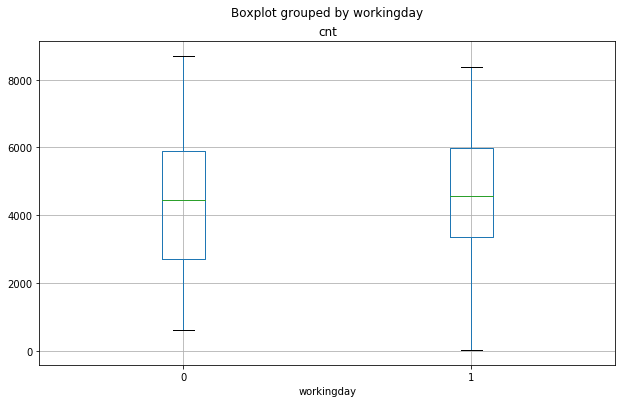

In [16]:
_=bike_sharing_data.boxplot(column=['cnt'],by='workingday',figsize=(10,6))

In [17]:
# Create 2 samples
sample_01 = bike_sharing_data[bike_sharing_data.workingday==1]
sample_02 = bike_sharing_data[bike_sharing_data.workingday==0]

In [18]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [19]:
# take random same number of data from sample 02
sample_01=sample_01.sample(231)

In [20]:
sample_02.shape

(231, 7)

# LEVENE'S Test: Estimate significance of difference between variance of 2 groups. 
# <span style='color:red'> $W=\frac{\left (N-K\right )\sum_{i=1}^{k}N_i(\bar Z_i - Z)^2}{\left (k-1 \right ) \sum_{i=1}^{k}\sum_{j=i}^{N_i}\left (Z_{ij}-\bar Z_i\right )^2}$ </span>

In [21]:
stats.levene(sample_01['cnt'],sample_02['cnt'])

LeveneResult(statistic=1.4506583500601682, pvalue=0.22904168095226446)

In [22]:
sample_01.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
321,4,11,0,1,1,0.274167,3392
719,4,12,0,1,2,0.330000,4128
263,3,9,0,1,2,0.595000,4352
600,3,8,0,1,1,0.695833,7765
562,3,7,0,1,1,0.763333,6830


In [23]:
sample_02.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
7,1,1,0,0,2,0.165000,959
8,1,1,0,0,1,0.138333,822
14,1,1,0,0,2,0.233333,1248


In [24]:
diff=scale(np.array(sample_01['cnt'])-np.array(sample_02['cnt'],dtype=np.float))

(array([ 6.,  9., 16., 41., 38., 35., 36., 24., 20.,  6.]),
 array([-2.48275569, -2.00716182, -1.53156795, -1.05597407, -0.5803802 ,
        -0.10478633,  0.37080754,  0.84640141,  1.32199528,  1.79758915,
         2.27318302]),
 <a list of 10 Patch objects>)

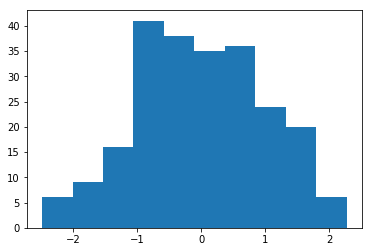

In [25]:
plt.hist(diff)

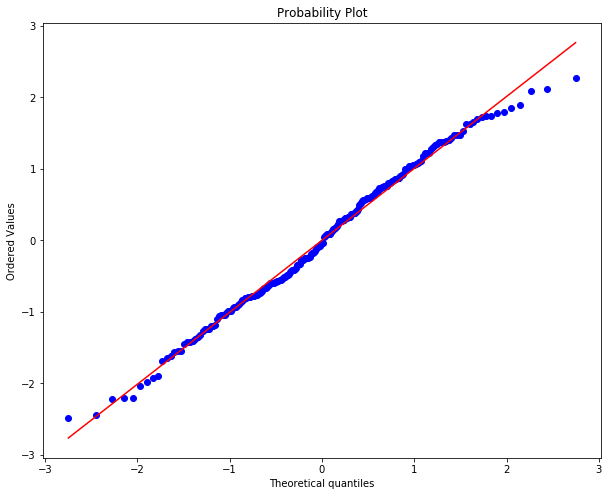

In [26]:
# Another to way to Check whether residual is normally distributed
plt.figure(figsize=(10,8))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

## Shapiro Wilk test for normality - If the test statistics is not significant then population is normally distributed

In [27]:
stats.shapiro(diff)

(0.9909620881080627, 0.16246125102043152)

In [28]:
# Since residual is normally distributed , we can perform t test
stats.ttest_ind(sample_01['cnt'],sample_02['cnt'])

Ttest_indResult(statistic=2.2379997236999936, pvalue=0.025698901712347507)

# Conclusion: Number of bike share doesn't have influence from WORKING day vs NON WORKING day

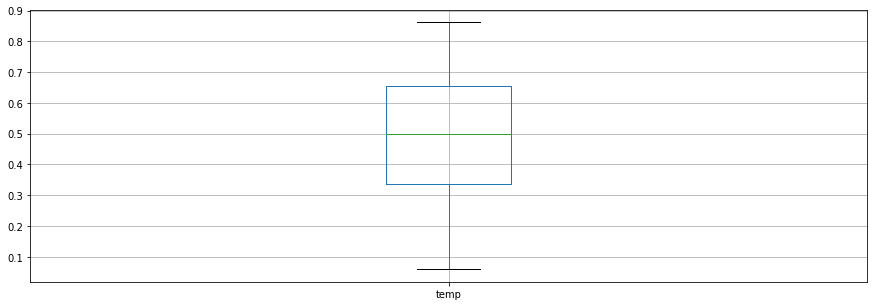

In [29]:
_=bike_sharing_data.boxplot(column='temp',figsize=(15,5))

In [30]:
# Divide dataset based upon temp , True for Temp above mean and False otherwise
bike_sharing_data['temp_category']=bike_sharing_data['temp']>bike_sharing_data.temp.mean()

In [31]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
530,2,6,0,1,1,0.648333,7363,True
342,4,12,0,1,1,0.290833,3620,False
88,2,3,0,1,2,0.300000,1536,False
715,4,12,0,0,2,0.362500,3786,False
246,3,9,0,0,1,0.709167,4940,True
86,2,3,0,1,1,0.264348,2028,False
321,4,11,0,1,1,0.274167,3392,False
320,4,11,0,1,2,0.341667,3053,False
107,2,4,0,1,1,0.512500,3429,True
122,2,5,0,1,2,0.616667,4451,True


In [32]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


In [33]:
#_=plt.hist(bike_sharing_data[bike_sharing_data.temp_category==False]['cnt'])

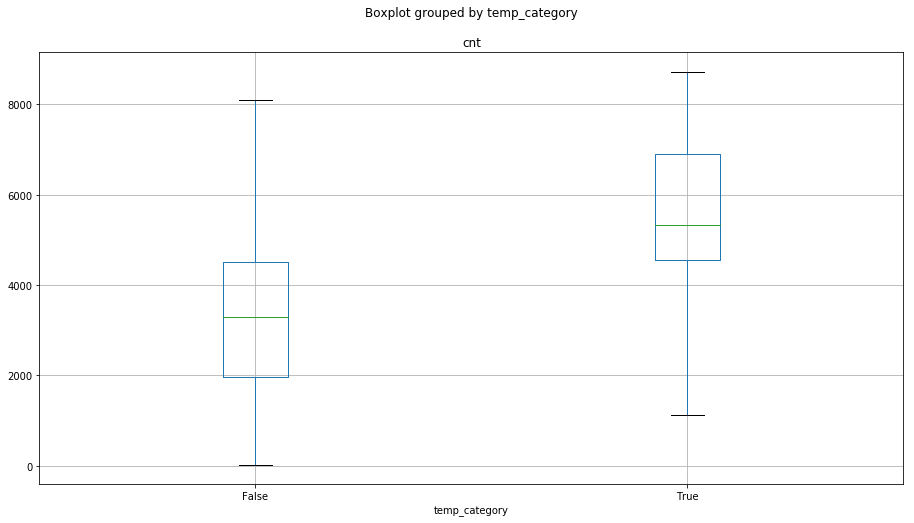

In [34]:
_=bike_sharing_data.boxplot(column='cnt',by='temp_category',figsize=(15,8))

## Are these counts significantly different between two temperature category
- We create 2 samples with equal numbers
- measure SD
- We use levene test to test significance of variance difference
- If significantly different SD then we use Welch's t Test to find out whether two samples are significantly different

In [35]:
sample_01= bike_sharing_data[bike_sharing_data.temp_category==True]
sample_02= bike_sharing_data[bike_sharing_data.temp_category==False]

In [36]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [37]:
sample_01=sample_01.sample(sample_02.shape[0])

In [38]:
sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [39]:
stats.levene(sample_01.cnt,sample_02.cnt)

LeveneResult(statistic=4.890683929001842, pvalue=0.027312767339387117)

## Above result gives p value less than threshold of 0.05 ~5% so we have to reject NULL HYPOTHESIS , meaning samples have variances significantly different. We can rely on t Test

In [40]:
# Now we can check whether residuals are normally distributed
diff = scale(np.array(sample_01.cnt) - np.array(sample_02.cnt))

C:\Users\Niraj Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(array([ 2.,  8., 18., 24., 60., 75., 77., 53., 30., 17.]),
 array([-3.22167011, -2.67591121, -2.1301523 , -1.5843934 , -1.0386345 ,
        -0.4928756 ,  0.0528833 ,  0.59864221,  1.14440111,  1.69016001,
         2.23591891]),
 <a list of 10 Patch objects>)

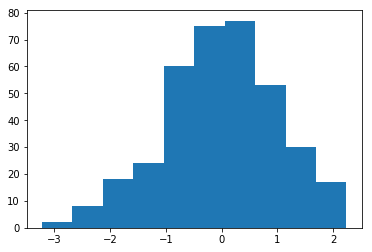

In [41]:
plt.hist(diff)

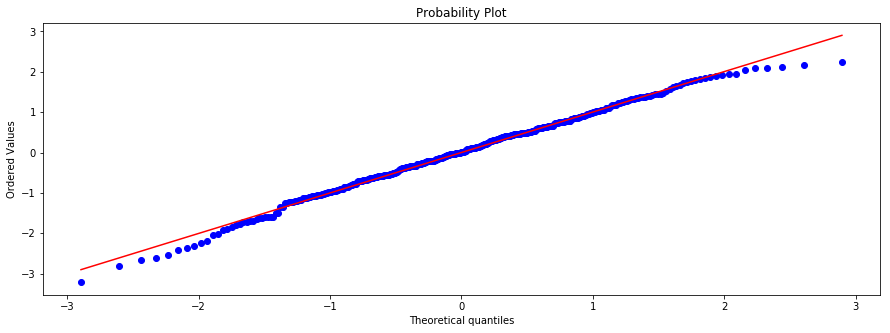

In [42]:
# Better technique to check normal distribution of RESIDUAL is probplot
plt.figure(figsize=(15,5))
stats.probplot(diff,plot=plt)
plt.show()

# Shapiro Test: Test to check if sample is from normally distributed population
# $W = \frac{\left (\sum_{i=1}^{n} a_ix_{(i)} \right)^2}{\sum_{i=1}^{n} \left(x_i - \bar{x} \right)^2}$  

## <span style='color:red'>If W is smaller than the threshold then NULL Hypothesis that sample has come from normlly distributed population is incorrect</span>

In [43]:
stats.shapiro(diff)

(0.9929843544960022, 0.08697399497032166)

## Above Shapiro test on residual values also indicate data spread is from Normally distributed  population

In [44]:
stats.ttest_ind(sample_01.cnt,sample_02.cnt)

Ttest_indResult(statistic=18.85367820271558, pvalue=7.686795544265814e-65)

# <span style='color:brown'> Conclusion: Number of rides depends upon temperature values are not INSIGNIFICANTLY different in two temperature group. This means temperature influences number of rides </span>

In [45]:
desciptives, results = rp.ttest(sample_01.cnt,sample_02.cnt, equal_variances=False)

# <span style='çolor:red'> In the above result, we carried out WELCHES T Test using Reserach Python package, WELCHES factors unequal variances </span>

In [46]:
#results
desciptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5605.096154,1474.613661,77.290757,5453.102285,5757.090023
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4496.380495,1935.209749,71.723645,4355.570308,4637.190681


In [47]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2217.4313
1      Degrees of freedom =    714.6910
2                       t =     18.8537
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.3975
7               Hedge's g =      1.3961
8           Glass's delta =      1.5037
9             Pearson's r =      0.5763
